# Using word embeddings to predict sentiment of movie reviews with the IMDB dataset (Basic model with an RNN layer)


From: Deep Learning with Python (Starting at Listing 6.27)

Reproduced by: Guy Feldman
 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from keras.datasets import imdb
from keras import preprocessing

import numpy as np

Using TensorFlow backend.


In [3]:
# Number of words to consider as features
max_features = 10000
# cut texts after this number of words
max_len =  500

# The IMDB Dataset

- The features are vectors of word indices that represent a review
- The output variable, y, indicates whether a review was positive or negative.

The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training set. Rare words will be discarded. This allows us to work with vector data of manageable size.




In [4]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=max_len)

# Embedding Layer from Keras

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN,LSTM

# Basic Model with SimpleRNN Layer

To build this model we,
1. add an embedding layer that will take the input vectors representing sentences (that live in $\mathbb{N}^{\text{max_len}}$) and embed each of the words in $\mathbb{R}^{32}$; 
2. feed the "embedded text" into an RNN layer so we can take advantage of the gramatical structure
3. Feed the sentence into a sigmoid layer for classification.

In [6]:
output_dim = 32
model = Sequential()
model.add(Embedding(max_features,output_dim,input_length=max_len))
model.add(SimpleRNN(output_dim))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s - loss: 0.6423 - acc: 0.6265 - val_loss: 0.5068 - val_acc: 0.8038
Epoch 2/10
20000/20000 [==============================] - 13s - loss: 0.3923 - acc: 0.8436 - val_loss: 0.4108 - val_acc: 0.8176
Epoch 3/10
20000/20000 [==============================] - 13s - loss: 0.2745 - acc: 0.8929 - val_loss: 0.4631 - val_acc: 0.7792
Epoch 4/10
20000/20000 [==============================] - 14s - loss: 0.1930 - acc: 0.9273 - val_loss: 0.3569 - val_acc: 0.8526
Epoch 5/10
20000/20000 [==============================] - 13s - loss: 0.1385 - acc: 0.9492 - val_loss: 0.5168 - val_acc: 0.8152
Epoch 6/10
20000/20000 [==============================] - 14s - loss: 0.0934 - acc: 0.9673 - val_loss: 0.4160 - val_acc: 0.8600
Epoch 7/10
20000/20000 [==============================] - 14s - loss: 0.0593 - acc: 0.9816 - val_loss: 0.6862 - val_acc: 0.7540
Epoch 8/10
20000/20000 [==============================]

# Model Limitation

Simple RNN can't learn long term relationships due to the vanishing gradient problem

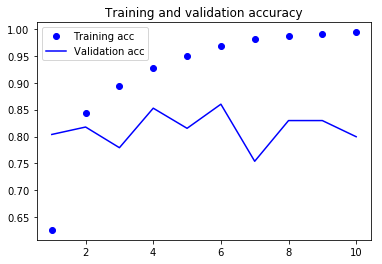

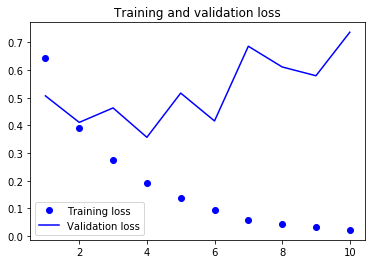

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Basic Model with LSTM Layer

In [6]:
output_dim = 32
model = Sequential()
model.add(Embedding(max_features,output_dim,input_length=max_len))
model.add(LSTM(output_dim))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train,y_train,
                    epochs = 10,
                    batch_size = 128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s - loss: 0.4919 - acc: 0.7696 - val_loss: 0.3185 - val_acc: 0.8742
Epoch 2/10
20000/20000 [==============================] - 80s - loss: 0.2904 - acc: 0.8901 - val_loss: 0.2833 - val_acc: 0.8858
Epoch 3/10
20000/20000 [==============================] - 81s - loss: 0.2293 - acc: 0.9130 - val_loss: 0.3815 - val_acc: 0.8782
Epoch 4/10
20000/20000 [==============================] - 84s - loss: 0.1992 - acc: 0.9249 - val_loss: 0.3113 - val_acc: 0.8798
Epoch 5/10
20000/20000 [==============================] - 83s - loss: 0.1730 - acc: 0.9385 - val_loss: 0.2874 - val_acc: 0.8846
Epoch 6/10
20000/20000 [==============================] - 82s - loss: 0.1569 - acc: 0.9429 - val_loss: 0.4848 - val_acc: 0.8432
Epoch 7/10
20000/20000 [==============================] - 80s - loss: 0.1460 - acc: 0.9492 - val_loss: 0.3350 - val_acc: 0.8808
Epoch 8/10
20000/20000 [==============================]

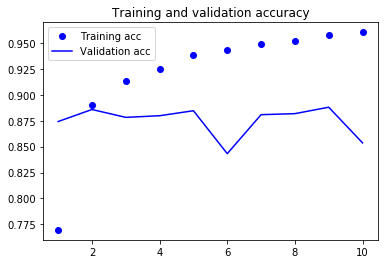

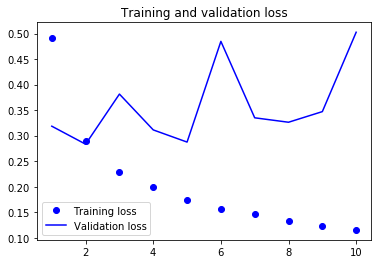

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()